# Name: Praveen Balireddy
# Roll: 2018201052

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math
from sklearn import metrics
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from collections import defaultdict
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import pickle
import warnings
import random
warnings.filterwarnings('ignore')

In [2]:
'''
Setting seed
'''
np.random.seed(10)

In [3]:
'''
Function to split the data into train and validation(80-20)
'''
def splitData(X ,Y, t_size = 0.2, r_state = 10):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = t_size , random_state = r_state)
    return (X_train, X_test, y_train, y_test)

## Reading Input

In [4]:
df = pd.read_csv("./intrusion_detection/data.csv")

In [5]:
df.head()

,duration,service,src_bytes,dst_bytes,hot,num_failed_logins,num_compromised,num_root,num_file_creations,num_access_files,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,xAttack
0,0,25,193,441,0,0,0,0,0,0,...,255,1.00,0.00,0.07,0.04,0.00,0.04,0.0,0.0,normal
1,0,38,0,0,0,0,0,0,0,0,...,1,0.00,0.07,0.00,0.00,0.00,0.00,1.0,1.0,dos
2,0,25,167,9724,0,0,0,0,0,0,...,255,1.00,0.00,0.03,0.06,0.00,0.00,0.0,0.0,normal
3,0,20,1339,0,0,0,0,0,0,0,...,31,0.23,0.04,0.23,0.00,0.02,0.00,0.0,0.0,normal
4,0,37,0,0,0,0,0,0,0,0,...,25,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.0,dos


In [6]:
df.describe()

,duration,service,src_bytes,dst_bytes,hot,num_failed_logins,num_compromised,num_root,num_file_creations,num_access_files,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,24998.000000,24998.000000,2.499800e+04,2.499800e+04,24998.000000,24998.000000,24998.000000,24998.000000,24998.000000,24998.000000,...,24998.000000,24998.000000,24998.000000,24998.000000,24998.000000,24998.000000,24998.000000,24998.000000,24998.000000,24998.000000
mean,310.648452,32.024842,2.442409e+04,3.305597e+03,0.193535,0.001200,0.229418,0.251700,0.014841,0.004360,...,182.405832,115.254580,0.520648,0.083117,0.148392,0.032109,0.284272,0.278418,0.118272,0.119189
std,2712.235502,16.493033,2.420103e+06,8.301712e+04,2.127846,0.045594,10.457662,11.545358,0.531652,0.098905,...,99.046209,110.659088,0.449020,0.188442,0.309335,0.111102,0.444531,0.445374,0.306349,0.317858
min,0.000000,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,20.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,84.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,25.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,62.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,50.000000,2.790000e+02,5.310000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42862.000000,70.000000,3.817091e+08,5.150836e+06,77.000000,4.000000,884.000000,975.000000,40.000000,8.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Preprocessing data

In [7]:
class preProcessor:
    def __init__(self):
        self.scalar = StandardScaler()
    def fit(self, df, features):
        # Separating out the features
        x = df[features]
        self.scalar = StandardScaler().fit(x)
    def transform(self, df, features):
        rest = [col for col in df.columns.values if col not in features]
        res = pd.DataFrame(self.scalar.transform(df), columns=features)
#         print(res)
        res[rest] = df[rest]
        return res

In [8]:
target = 'xAttack'
features = df.columns.values[[df.columns.values != 'xAttack']]
features

array(['duration', 'service', 'src_bytes', 'dst_bytes', 'hot',
       'num_failed_logins', 'num_compromised', 'num_root',
       'num_file_creations', 'num_access_files', 'count', 'srv_count',
       'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate',
       'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate',
       'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate'], dtype=object)

In [9]:
# lb_make = LabelEncoder()
# df[target] = lb_make.fit_transform(df[target])

In [10]:
df.head()

,duration,service,src_bytes,dst_bytes,hot,num_failed_logins,num_compromised,num_root,num_file_creations,num_access_files,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,xAttack
0,0,25,193,441,0,0,0,0,0,0,...,255,1.00,0.00,0.07,0.04,0.00,0.04,0.0,0.0,normal
1,0,38,0,0,0,0,0,0,0,0,...,1,0.00,0.07,0.00,0.00,0.00,0.00,1.0,1.0,dos
2,0,25,167,9724,0,0,0,0,0,0,...,255,1.00,0.00,0.03,0.06,0.00,0.00,0.0,0.0,normal
3,0,20,1339,0,0,0,0,0,0,0,...,31,0.23,0.04,0.23,0.00,0.02,0.00,0.0,0.0,normal
4,0,37,0,0,0,0,0,0,0,0,...,25,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.0,dos


### Util Functions

In [11]:
def linear(x):
    '''
    Activation function - Rectified Linear Unit
    '''
    return x

def ReLU(x):
    '''
    Activation function - Rectified Linear Unit
    '''
    return np.maximum(x, 0)

def sigmoid(x):
    '''
    Activation function - Sigmoid
    '''
    y = 1/(1+np.exp(-x))
    return y

def softmax(x):
    '''
    Activation function - softmax 
    '''
    y = np.exp(x)
    res = y / np.sum(y, axis=1, keepdims=True)
    return np.nan_to_num(res)

def crossEntropy(y, yhat):
    '''
    Loss Function - Cross Entropy
    '''
    e = np.multiply(y, np.log(1e-10+yhat)) + np.multiply(1-y, np.log(1e-10+1-yhat))
    return -1/len(y)*np.mean(np.sum(e, axis=0))

def MSE(y, yhat):
    '''
    Mean Squared Error
    '''
    return np.mean(np.sum((y-yhat)**2,axis=1),axis=0)/2

def plotLossCurve(myNN):
    '''
    Function to plot the Loss vs Iteration Number
    '''
    ax = plt.subplot()
    ax.plot(list(range(len(myNN.costs))), myNN.costs)
    ax.set_title("Loss vs Iteration")
    ax.set_xlabel("Iteration Number")
    ax.set_ylabel("Loss")
    plt.show()

def plotLossCurves(myNNs, acts):
    '''
    Function to plot the Loss vs Iteration Number for different activation functions
    '''
    ax = plt.subplot()
    for myNN, act in zip(myNNs, acts):
        ax.plot(list(range(len(myNN.costs))), myNN.costs, label = act)
        ax.set_title("Loss vs Iteration")
        ax.set_xlabel("Iteration Number")
        ax.set_ylabel("Loss")
        ax.legend(loc = "upper right")
    plt.show()

def plotErrorCurve(myNN):
    '''
    Function to plot the Error vs Iteration Number
    '''
    ax = plt.subplot()
    ax.plot(list(range(len(myNN.errors))), myNN.errors)
    ax.set_title("Error vs Iteration")
    ax.set_xlabel("Iteration Number")
    ax.set_ylabel("Error")
    plt.show()

## Question 1 : Doing dimentionality reduction using auto encoder

### My AutoEncoder

In [12]:
class AutoEncoder:
    def __init__(self, input_layer, hidden_layers, output_layer, alpha, iterations, batch_size = 256,
                 hidden_activation = 'linear', input_activation = 'linear', output_activation = 'linear',
                 scale=True):
        '''
        Initializing the neural network parameters
        '''
        self.layers = [input_layer] + hidden_layers + [output_layer]
        self.input_layer = input_layer
        self.hidden_activation = hidden_activation
        self.output_layer = output_layer
        self.output_activation = output_activation
        self.input_activation = input_activation
        self.alpha = alpha
        self.iterations = iterations
        self.batch_size = batch_size
        self.dz = []
        self.da = []
        self.dw = []
        self.W = []
        self.db = []
        self.z = []
        self.a = []
        self.b = []
        self.yhat = None
        self.initialize_weights()
        self.scalar = None
        self.scale = scale
        self.bottlenecklayer = int(len(hidden_layers)/2)+1
        
    def loadWeights(self, path = "./weights/weights.pickle"):
        '''
        Load weights/bias/standard scalar
        '''
        with open(path, 'rb') as handle:
            weights = pickle.load(handle)
        self.W = weights['w']
        self.b = weights['b']
        self.scalar = weights['scalar']

    def saveWeights(self, path = "./weights/weights.pickle"):
        '''
        Save weights/bias/standard scalar
        '''
        weights = {}
        weights['w'] = self.W
        weights['b'] = self.b
        weights['scalar'] = self.scalar
        with open(path, 'wb') as handle:
            pickle.dump(weights, handle, protocol=pickle.HIGHEST_PROTOCOL)
        
    def standardize(self, X_train):
        '''
        Standardize the input data 
        '''
        if(self.scalar is None):
            scalar = StandardScaler()
            self.scalar = scalar.fit(X_train)
        return self.scalar.transform(X_train)
    
    def initialize_weights(self):
        '''
        Initializing the weights and bias
        '''
        np.random.seed(20) ## Setting the seed
        for i in range(len(self.layers)-1):
            wt = np.random.randn(self.layers[i+1],self.layers[i])*np.sqrt(2/self.layers[i])
            w = wt.T
#             w = np.random.randn(self.layers[i],self.layers[i+1])*np.sqrt(2/self.layers[i])
            self.W.append(w)
            b = np.ones(self.layers[i+1]).reshape(1,-1)
            self.b.append(b)
        
    def train(self, X_train):
        '''
        Training the neural network model
        '''
        X_train = X_train.copy()
        if(len(X_train) == 1):
            # Converting the 1-d array to 2-d
            X_train = X_train.values.reshape(1,-1)
        else:
            X_train = X_train.values
        if(self.scale):
            X_train = self.standardize(X_train)
        if(self.input_activation == "linear"):
            X_train = linear(X_train)
        elif(self.input_activation == "sigmoid"):
            X_train = sigmoid(X_train)
        elif(self.input_activation == "tanh"):
            X_train = tanh(X_train)
        encoded_y = X_train.copy()
#         print(encoded_y)
        self.costs = []
        self.errors = []
        for i in range(self.iterations):
            '''
            Running batch gradient descendent
            '''
            offset = 0
            while(True):
                start = offset
                end = min(offset + self.batch_size, len(X_train))
                self.forward_propagation(X_train[start:end, :])
                self.backward_propagation(encoded_y[start:end, :], self.yhat[start:end], self.alpha)
                offset += self.batch_size
                if(offset >= len(X_train)):
                    break
            self.costs.append(MSE(encoded_y, self.yhat)) ## Append the epoch loss
            self.yhat = None
            
    def forward_propagation(self, X_train):
        '''
        Forward propagation: called for each batch 
        '''
        a = X_train
        self.a.append(a)
        for i in range(len(self.W)):
            z = np.dot(a, self.W[i]) + self.b[i]
            self.z.append(z)
            if(i == len(self.W)-1):
                '''
                Output layer
                '''
                if(self.output_activation == "linear"):
                    temp = linear(z)
                elif(self.output_activation == "sigmoid"):
                    temp = sigmoid(z)
                elif(self.output_activation == "tanh"):
                    temp = tanh(z)
                elif(self.output_activation == "sigmoid"):
                    temp = sigmoid(z)
                if(self.yhat is None):
                    self.yhat = temp
                else:
                    self.yhat = np.append(self.yhat, temp, axis=0)
            else:
                '''
                Hidden layers
                '''
                if(self.hidden_activation == "relu"):
                    a = ReLU(z)
                elif(self.hidden_activation == "sigmoid"):
                    a = sigmoid(z)
                elif(self.hidden_activation == "tanh"):
                    a = np.tanh(z)
                elif(self.hidden_activation == "linear"):
                    a = linear(z)
                self.a.append(a)
#         print(self.yhat)
    
    def reset_layer_metrics(self):
        '''
        Resetting the internal forward/backward data arrays
        '''
        self.dz = []
        self.da = []
        self.dw = []
        self.db = []
        self.z = []
        self.a = []
    
    def backward_propagation(self, Y_train, yhat, alpha):
        '''
        backward propagation: called for each batch after call to forward propagation
        '''
        temp_W = self.W.copy()
        m = len(Y_train)
        for i in range(len(self.W)-1, -1, -1):
            if(i == len(self.W)-1):
                '''
                Ouput layer
                '''
                if(self.output_activation == "linear"):
                    dz_temp = (yhat - Y_train)/len(yhat)
                elif(self.output_activation == "sigmoid"):
                    dz_temp = yhat - Y_train
                elif(self.output_activation == "softmax"):
                    dz_temp = yhat - Y_train
            else:
                '''
                Hidden layers
                '''
                if(self.hidden_activation == "relu"):
                    dz_temp = np.multiply(np.dot(self.dz[-1], temp_W[i+1].T), (self.a[i+1] > 0).astype(int)) # For RELU
                elif(self.hidden_activation == "sigmoid"):
                    dz_temp = np.multiply(np.dot(self.dz[-1], temp_W[i+1].T), np.multiply(self.a[i+1], 1 - self.a[i+1])) # For Sigmoid
                elif(self.hidden_activation == "tanh"):
                    dz_temp = np.multiply(np.dot(self.dz[-1], temp_W[i+1].T), 1 - np.square(np.tanh(self.a[i+1]))) # For tanh
                elif(self.hidden_activation == "linear"):
                    dz_temp = np.dot(self.dz[-1], temp_W[i+1].T) # For linear
            self.dz.append(dz_temp) ## delta
            db_temp = (1/m)*np.sum(dz_temp, axis=0, keepdims=True) ## db
            self.db.append(db_temp)
            dw_temp = (1/m)*np.dot(self.a[i].T, dz_temp) ## dw
            self.dw.append(dw_temp)
            
            ## Updating the weight and bais of the layer i
            self.W[i] = self.W[i] - alpha*dw_temp
            self.b[i] = self.b[i] - alpha*db_temp
#         print(self.W)
        self.reset_layer_metrics()
    
    def printWeights(self):
        '''
        print the current weights/bias
        '''
        print(self.W)
        print(self.b)

    def reduceDimensions(self, X_test):
        '''
        predict the output labels for the given test input
        '''
        X_test = X_test.copy()
        self.yhat = None
        self.reset_layer_metrics()
        X_test = np.array(X_test)
        X_test = self.standardize(X_test)
        self.forward_propagation(X_test)
        df = self.a[self.bottlenecklayer]
        new_cols = ['dim_']*len(df[1])
        for i in range(len(new_cols)):
            new_cols[i] = new_cols[i] + str(i+1)
        return pd.DataFrame(df,columns=new_cols)
    
    def Loss(self, X_test, y_test):
        '''
        Return the Loss of the test dataset
        '''
        self.yhat = None
        self.reset_layer_metrics()
        X_test = np.array(X_test)
        X_test = self.standardize(X_test)
        self.forward_propagation(X_test)
        res = self.yhat.copy()
        onehot_encoder = OneHotEncoder(n_values=10,sparse=False) ## One hot encode of the output labels
        encoded_y = onehot_encoder.fit_transform(y_test)
        return crossEntropy(encoded_y, res)

### Implementation Details:
1. Coded simple and deep autoencoder
3. Played around with "relu", "sigmoid", "tanh" as the hidden layer activation functions

In [13]:
X = df.iloc[:,df.columns != target]
Y = df[target]

### All Linear

In [14]:
myNN = AutoEncoder(input_layer=X.shape[1], hidden_layers=[14], output_layer=X.shape[1], alpha=0.1,
                    iterations=200, batch_size = 256, hidden_activation = 'linear', output_activation = 'linear')
myNN.train(X)
print("Mean Squared Error")
myNN.costs[-1]

Mean Squared Error


2.1517563275898266

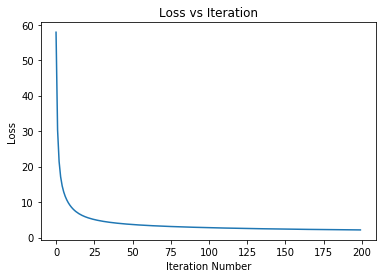

In [15]:
plotLossCurve(myNN)

### Input/Output - Linear, Hidden - sigmoid

In [16]:
myNN1 = AutoEncoder(input_layer=X.shape[1], hidden_layers=[14], output_layer=X.shape[1], alpha=0.1,
                    iterations=40, batch_size = 256, hidden_activation = 'linear', output_activation = 'sigmoid',
                  input_activation='sigmoid')
myNN1.train(X)
print("Mean Squared Error")
myNN1.costs[-1]

Mean Squared Error


0.014464234213423188

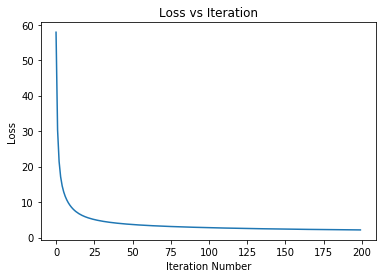

In [17]:
plotLossCurve(myNN)

### Input/Output - sigmoid, Hidden - sigmoid

In [18]:
myNN = AutoEncoder(input_layer=X.shape[1], hidden_layers=[14], output_layer=X.shape[1], alpha=0.1,
                    iterations=80, batch_size = 256, hidden_activation = 'sigmoid', output_activation = 'sigmoid',
                   input_activation='sigmoid')
myNN.train(X)
print("Mean Squared Error")
myNN.costs[-1]

Mean Squared Error


0.026190517056719122

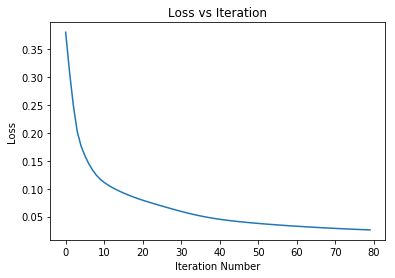

In [19]:
plotLossCurve(myNN)

### Deep Autoencoder Input/Output - sigmoid, Hidden - sigmoid

In [20]:
myNN = AutoEncoder(input_layer=X.shape[1], hidden_layers=[20,14,20], output_layer=X.shape[1], alpha=0.1,
                    iterations=100, batch_size = 256, hidden_activation = 'sigmoid', output_activation = 'sigmoid',
                   input_activation='sigmoid')
myNN.train(X)
print("Mean Squared Error")
myNN.costs[-1]

Mean Squared Error


0.06354977671105777

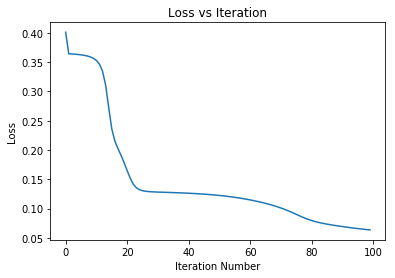

In [21]:
plotLossCurve(myNN)

### Util Functions

In [22]:
def calcPurity(n_clusters, y_pred , y):
    labels_ = {}
    y_pred = np.array(y_pred)
    y = np.array(y)
    for i in range(n_clusters):
        lst = list(y[y_pred == i])
        labels_[i]  = max(set(lst), key=lst.count)
    purity = {}
    for i in range(n_clusters):
        temp = y_pred[y_pred == i]
        temp = np.array([labels_[i] for i in temp])
        y1 = y[y_pred == i]
        purity[i] = len(temp[temp == y1])/len(temp)
    return (labels_, purity)

### My K-Means

In [23]:
class MyKmeans():
    '''
    K-Means Class
    '''
    def __init__(self, n_clusters = 3, random_state = 0, max_iter=300, tol=0.0001):
        self.n_clusters = n_clusters
        self.random_state = random_state
        self.max_iter = max_iter
        self.tol = tol
    
    def fit(self, df, y):
        np_df = df.values
        y = y.values
        self.cols = df.columns.values
        self.centers = {}
        temp = random.sample(range(df.shape[0]),self.n_clusters)
        for i in range(len(temp)):
            self.centers[i] = np_df[temp[i]]
        for i in range(self.max_iter):
            self.classes = {}
            self.indexes = {}
            prev_centers = dict(self.centers)
            for t in range(self.n_clusters):
                self.classes[t] = []
                self.indexes[t] = []
            start = 0
            for row in np_df:
                dists = [np.linalg.norm(row-self.centers[c]) for c in self.centers]
                index = dists.index(min(dists))
                self.classes[index].append(row)
                self.indexes[index].append(start)
                start += 1
            for t in range(len(self.centers)):
                self.centers[t] = np.average(self.classes[t], axis = 0)
            flag = True
            error = 0.00
            for t in range(len(self.centers)):
                e = np.linalg.norm(prev_centers[t]-self.centers[t])
                error += e
                if(e > self.tol):
                    flag = False
#             print("Iteration: {0}".format(i))
#             print("Error: {0}".format(float(error)))
            if(flag):
                break
        self.labels_ = {}
        for t in range(self.n_clusters):
            lst = list(y[self.indexes[t]])
#             print(lst)
            self.labels_[t] = max(set(lst), key=lst.count)
        self.purity = {}
        for t in range(self.n_clusters):
            self.purity[t] = len(y[self.indexes[t]][y[self.indexes[t]] == self.labels_[t]])/len(self.classes[t])
    
    def predict_row(self, row):
        dists = [np.linalg.norm(row-self.centers[c]) for c in self.centers]
        index = dists.index(min(dists))
        return index
        
    def predict(self, df):
        res = []
        for row in df.values:
            res.append(self.predict_row(row))
        return np.array(res)

## All Linear activations

In [24]:
myNN = AutoEncoder(input_layer=X.shape[1], hidden_layers=[14], output_layer=X.shape[1], alpha=0.1,
                    iterations=80, batch_size = 256, hidden_activation = 'linear', output_activation = 'linear')
myNN.train(X)
print("Mean Squared Error")
myNN.costs[-1]

Mean Squared Error


3.049340516585485

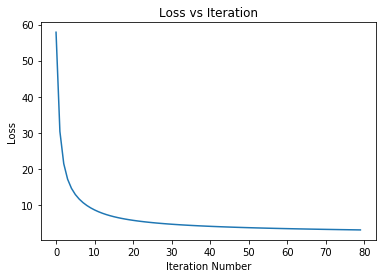

In [25]:
plotLossCurve(myNN)

In [26]:
X_train = myNN.reduceDimensions(X)
y_train = Y
X_train, X_test, y_train, y_test = splitData(X_train, y_train)
kmeans = MyKmeans(5, max_iter=20)
kmeans.fit(X_train, y_train)
kmeans_pred = kmeans.predict(X_train)

### Part-2 K-Means

In [27]:
print("KMeans Purity:")
calcPurity(5, kmeans_pred, y_train)

KMeans Purity:


({0: 'dos', 1: 'normal', 2: 'normal', 3: 'probe', 4: 'dos'},
 {0: 0.45755517826825126,
  1: 0.8381753312945973,
  2: 0.9295057138923309,
  3: 0.7404580152671756,
  4: 0.9835680751173709})

### Sklearn K means

In [28]:
from sklearn.cluster import KMeans

In [29]:
kmeans1 = KMeans(n_clusters=5, random_state=0).fit(X_train)

In [30]:
sk_kmeans_pred = kmeans1.predict(X_train)

In [31]:
calcPurity(5, sk_kmeans_pred, y_train)

({0: 'dos', 1: 'dos', 2: 'normal', 3: 'normal', 4: 'normal'},
 {0: 0.43767762890783596,
  1: 0.9830477908025248,
  2: 0.9233541233541234,
  3: 0.729236577181208,
  4: 1.0})

### Part-3 GMM

In [32]:
from scipy.misc import imread, imshow
from sklearn import mixture
gmm = mixture.GaussianMixture(covariance_type='full', n_components=5)
gmm.fit(X_train)
gmm_pred = gmm.predict(X_train)

In [33]:
print(gmm_pred)

[1 2 2 ... 1 2 1]


In [34]:
calcPurity(5, gmm_pred, y_train)

({0: 'dos', 1: 'normal', 2: 'dos', 3: 'probe', 4: 'normal'},
 {0: 0.5873330034636318,
  1: 0.9404499877720714,
  2: 1.0,
  3: 0.9915110356536503,
  4: 0.5813510941960038})

### Part-4 Hierarchical clustering with single-linkage and five clusters.

In [35]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='single')  
hclust_pred = cluster.fit_predict(X_train)  

In [36]:
calcPurity(5, hclust_pred, y_train)

({0: 'normal', 1: 'normal', 2: 'normal', 3: 'probe', 4: 'r2l'},
 {0: 1.0, 1: 0.5350012509382036, 2: 1.0, 3: 1.0, 4: 0.6})

### Part-5 Bar Charts

In [37]:
cluster_types = {"kmeans" : kmeans_pred, "gmm" : gmm_pred, "hclust" : hclust_pred}

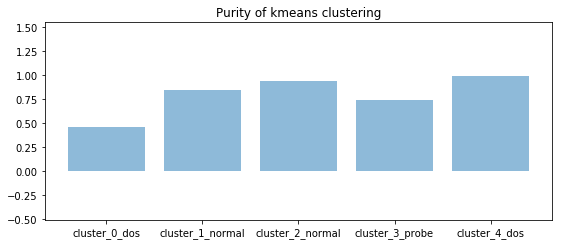

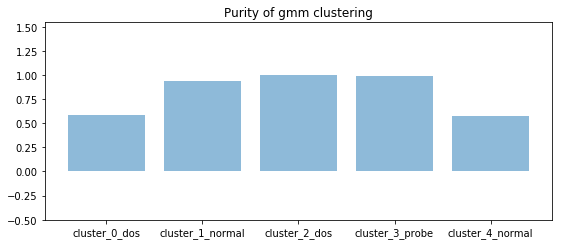

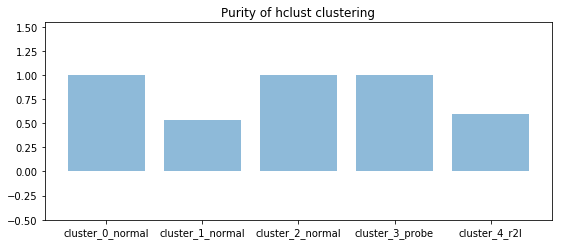

In [38]:
plot_index = 0
for cluster_type, y_pred in cluster_types.items():
    labels, purity = calcPurity(5, y_pred, y_train)
    labels = ["cluster_" + str(k) + "_" + val for k, val in labels.items()]
    sizes = [val for k, val in purity.items()]
    # print(sizes) # adds up to 1433, which is the total number of participants
    ax1 = plt.subplot(2,2,plot_index+1)
    ax1.figure.set_size_inches(20, 8)
#     ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
    plt.bar(labels, sizes, align='center', alpha=0.5)
    ax1.axis('equal')
    ax1.set_title("Purity of " + str(cluster_type) + " clustering")
    plot_index += 1
    plt.show()

## Input/Output - Linear, Hidden - sigmoid

In [39]:
myNN = AutoEncoder(input_layer=X.shape[1], hidden_layers=[14], output_layer=X.shape[1], alpha=0.1,
                    iterations=40, batch_size = 256, hidden_activation = 'linear', output_activation = 'sigmoid',
                  input_activation='sigmoid')
myNN.train(X)
print("Mean Squared Error")
myNN.costs[-1]

Mean Squared Error


0.014464234213423188

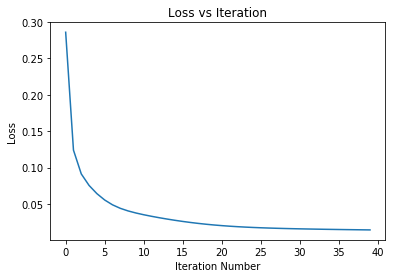

In [40]:
plotLossCurve(myNN)

In [41]:
X_train = myNN.reduceDimensions(X)
y_train = Y
X_train, X_test, y_train, y_test = splitData(X_train, y_train)
kmeans = MyKmeans(5, max_iter=20)
kmeans.fit(X_train, y_train)
kmeans_pred = kmeans.predict(X_train)

### Part-2 K-Means

In [42]:
print("KMeans Purity:")
calcPurity(5, kmeans_pred, y_train)

KMeans Purity:


({0: 'normal', 1: 'dos', 2: 'dos', 3: 'dos', 4: 'probe'},
 {0: 0.8484440706476031,
  1: 0.9777841892671668,
  2: 0.6539162112932605,
  3: 0.9889793962625779,
  4: 0.8590308370044053})

### Sklearn K means

In [43]:
from sklearn.cluster import KMeans

In [44]:
kmeans1 = KMeans(n_clusters=5, random_state=0).fit(X_train)

In [45]:
sk_kmeans_pred = kmeans1.predict(X_train)

In [46]:
calcPurity(5, sk_kmeans_pred, y_train)

({0: 'dos', 1: 'normal', 2: 'dos', 3: 'probe', 4: 'normal'},
 {0: 0.9867849384503983,
  1: 0.8444830582102519,
  2: 0.45986336464560207,
  3: 0.7025641025641025,
  4: 0.9258826583592938})

### Part-3 GMM

In [47]:
from scipy.misc import imread, imshow
from sklearn import mixture
gmm = mixture.GaussianMixture(covariance_type='full', n_components=5)
gmm.fit(X_train)
gmm_pred = gmm.predict(X_train)

In [48]:
print(gmm_pred)

[4 2 2 ... 4 2 4]


In [49]:
calcPurity(5, gmm_pred, y_train)

({0: 'dos', 1: 'normal', 2: 'dos', 3: 'probe', 4: 'normal'},
 {0: 0.5736392742796158,
  1: 0.6844919786096256,
  2: 1.0,
  3: 0.5614973262032086,
  4: 0.8822689511941848})

### Part-4 Hierarchical clustering with single-linkage and five clusters.

In [50]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='single')  
hclust_pred = cluster.fit_predict(X_train)  

In [51]:
calcPurity(5, hclust_pred, y_train)

({0: 'normal', 1: 'r2l', 2: 'normal', 3: 'probe', 4: 'normal'},
 {0: 0.5351175587793897, 1: 0.6, 2: 1.0, 3: 1.0, 4: 1.0})

### Part-5 Bar Charts

In [52]:
cluster_types = {"kmeans" : kmeans_pred, "gmm" : gmm_pred, "hclust" : hclust_pred}

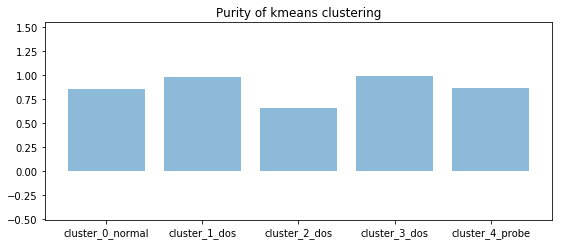

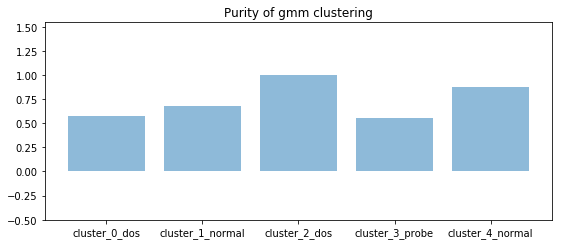

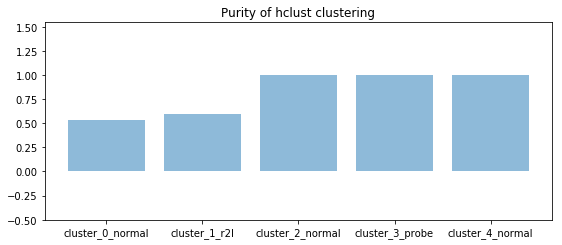

In [53]:
plot_index = 0
for cluster_type, y_pred in cluster_types.items():
    labels, purity = calcPurity(5, y_pred, y_train)
    labels = ["cluster_" + str(k) + "_" + val for k, val in labels.items()]
    sizes = [val for k, val in purity.items()]
    # print(sizes) # adds up to 1433, which is the total number of participants
    ax1 = plt.subplot(2,2,plot_index+1)
    ax1.figure.set_size_inches(20, 8)
#     ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
    plt.bar(labels, sizes, align='center', alpha=0.5)
    ax1.axis('equal')
    ax1.set_title("Purity of " + str(cluster_type) + " clustering")
    plot_index += 1
    plt.show()

## Input/Output - sigmoid, Hidden - sigmoid

In [54]:
myNN = AutoEncoder(input_layer=X.shape[1], hidden_layers=[14], output_layer=X.shape[1], alpha=0.1,
                    iterations=80, batch_size = 256, hidden_activation = 'sigmoid', output_activation = 'sigmoid',
                   input_activation='sigmoid')
myNN.train(X)
print("Mean Squared Error")
myNN.costs[-1]

Mean Squared Error


0.026190517056719122

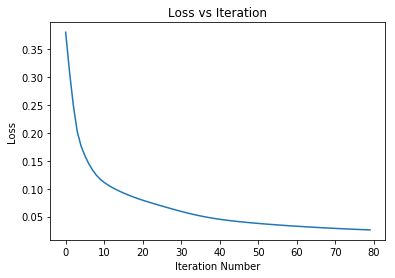

In [55]:
plotLossCurve(myNN)

In [56]:
X_train = myNN.reduceDimensions(X)
y_train = Y
X_train, X_test, y_train, y_test = splitData(X_train, y_train)
kmeans = MyKmeans(5, max_iter=20)
kmeans.fit(X_train, y_train)
kmeans_pred = kmeans.predict(X_train)

### Part-1 K-Means

In [57]:
print("KMeans Purity:")
calcPurity(5, kmeans_pred, y_train)

KMeans Purity:


({0: 'normal', 1: 'probe', 2: 'normal', 3: 'dos', 4: 'dos'},
 {0: 0.9598187906243845,
  1: 0.5287214329833231,
  2: 0.8717668488160292,
  3: 0.4742177170559718,
  4: 0.9815984124120513})

### Sklearn K means

In [58]:
from sklearn.cluster import KMeans

In [59]:
kmeans1 = KMeans(n_clusters=5, random_state=0).fit(X_train)

In [60]:
sk_kmeans_pred = kmeans1.predict(X_train)

In [61]:
calcPurity(5, sk_kmeans_pred, y_train)

({0: 'normal', 1: 'dos', 2: 'normal', 3: 'normal', 4: 'dos'},
 {0: 0.8216216216216217,
  1: 0.9794705564559697,
  2: 0.7237969676994067,
  3: 0.9106685071977914,
  4: 0.4664065886432596})

### Part-3 GMM

In [62]:
from scipy.misc import imread, imshow
from sklearn import mixture
gmm = mixture.GaussianMixture(covariance_type='full', n_components=5)
gmm.fit(X_train)
gmm_pred = gmm.predict(X_train)

In [63]:
print(gmm_pred)

[4 3 3 ... 4 2 4]


In [64]:
calcPurity(5, gmm_pred, y_train)

({0: 'dos', 1: 'normal', 2: 'normal', 3: 'dos', 4: 'normal'},
 {0: 0.6281287246722288,
  1: 0.9346541536322558,
  2: 0.5395904436860068,
  3: 1.0,
  4: 1.0})

### Part-4 Hierarchical clustering with single-linkage and five clusters.

In [65]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='single')  
hclust_pred = cluster.fit_predict(X_train)  

In [66]:
calcPurity(5, hclust_pred, y_train)

({0: 'normal', 1: 'normal', 2: 'normal', 3: 'probe', 4: 'probe'},
 {0: 0.5350640256102441, 1: 1.0, 2: 1.0, 3: 1.0, 4: 1.0})

### Part-5 Bar Charts

In [67]:
cluster_types = {"kmeans" : kmeans_pred, "gmm" : gmm_pred, "hclust" : hclust_pred}

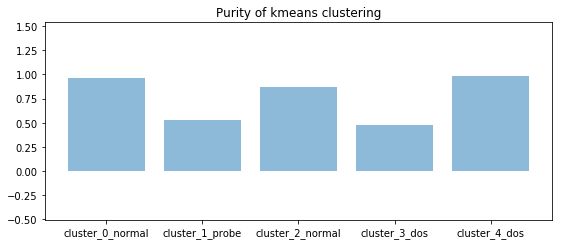

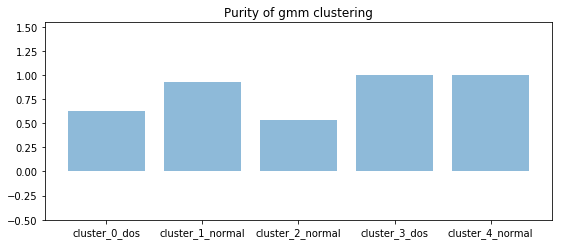

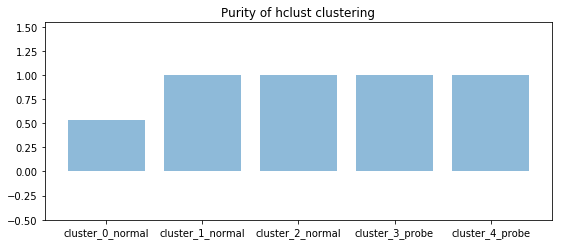

In [68]:
plot_index = 0
for cluster_type, y_pred in cluster_types.items():
    labels, purity = calcPurity(5, y_pred, y_train)
    labels = ["cluster_" + str(k) + "_" + val for k, val in labels.items()]
    sizes = [val for k, val in purity.items()]
    # print(sizes) # adds up to 1433, which is the total number of participants
    ax1 = plt.subplot(2,2,plot_index+1)
    ax1.figure.set_size_inches(20, 8)
#     ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
    plt.bar(labels, sizes, align='center', alpha=0.5)
    ax1.axis('equal')
    ax1.set_title("Purity of " + str(cluster_type) + " clustering")
    plot_index += 1
    plt.show()

## Deep Autoencoder Input/Output - sigmoid, Hidden - sigmoid

In [69]:
myNN = AutoEncoder(input_layer=X.shape[1], hidden_layers=[20,14,20], output_layer=X.shape[1], alpha=0.1,
                    iterations=100, batch_size = 256, hidden_activation = 'sigmoid', output_activation = 'sigmoid',
                   input_activation='sigmoid')
myNN.train(X)
print("Mean Squared Error")
myNN.costs[-1]

Mean Squared Error


0.06354977671105777

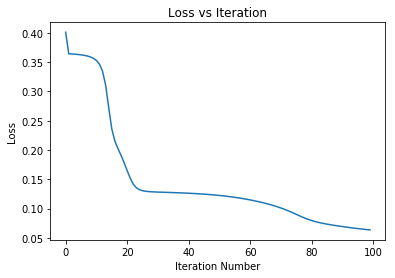

In [70]:
plotLossCurve(myNN)

In [71]:
X_train = myNN.reduceDimensions(X)
y_train = Y
X_train, X_test, y_train, y_test = splitData(X_train, y_train)
kmeans = MyKmeans(5, max_iter=20)
kmeans.fit(X_train, y_train)
kmeans_pred = kmeans.predict(X_train)

### Part-2 K-Means

In [72]:
print("KMeans Purity:")
calcPurity(5, kmeans_pred, y_train)

KMeans Purity:


({0: 'normal', 1: 'normal', 2: 'normal', 3: 'dos', 4: 'dos'},
 {0: 0.6326473859844272,
  1: 0.9599480407014506,
  2: 0.882755127880476,
  3: 0.48189539561913275,
  4: 0.9744505985349294})

### Sklearn K means

In [73]:
from sklearn.cluster import KMeans

In [74]:
kmeans1 = KMeans(n_clusters=5, random_state=0).fit(X_train)

In [75]:
sk_kmeans_pred = kmeans1.predict(X_train)

In [76]:
calcPurity(5, sk_kmeans_pred, y_train)

({0: 'dos', 1: 'dos', 2: 'normal', 3: 'normal', 4: 'normal'},
 {0: 0.47197898423817863,
  1: 0.973580863977151,
  2: 0.7361887026691496,
  3: 0.9678059200488252,
  4: 0.6706359260197619})

### Part-3 GMM

In [77]:
from scipy.misc import imread, imshow
from sklearn import mixture
gmm = mixture.GaussianMixture(covariance_type='full', n_components=5)
gmm.fit(X_train)
gmm_pred = gmm.predict(X_train)

In [78]:
print(gmm_pred)

[2 1 1 ... 2 1 2]


In [79]:
calcPurity(5, gmm_pred, y_train)

({0: 'normal', 1: 'dos', 2: 'normal', 3: 'dos', 4: 'normal'},
 {0: 0.6945686900958467,
  1: 1.0,
  2: 0.9943741209563994,
  3: 0.4857916102841678,
  4: 0.7883556254917388})

### Part-4 Hierarchical clustering with single-linkage and five clusters.

In [80]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='single')  
hclust_pred = cluster.fit_predict(X_train)  

In [81]:
calcPurity(5, hclust_pred, y_train)

({0: 'normal', 1: 'normal', 2: 'probe', 3: 'normal', 4: 'normal'},
 {0: 0.534990745835626, 1: 1.0, 2: 1.0, 3: 1.0, 4: 1.0})

### Part-5 Bar Charts

In [82]:
cluster_types = {"kmeans" : kmeans_pred, "gmm" : gmm_pred, "hclust" : hclust_pred}

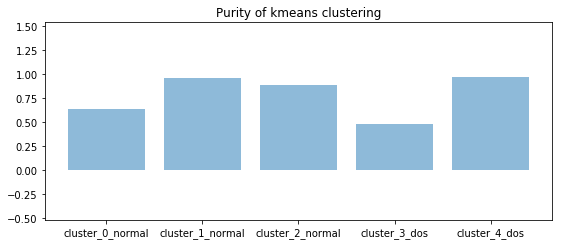

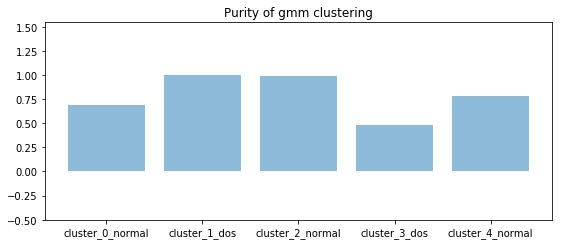

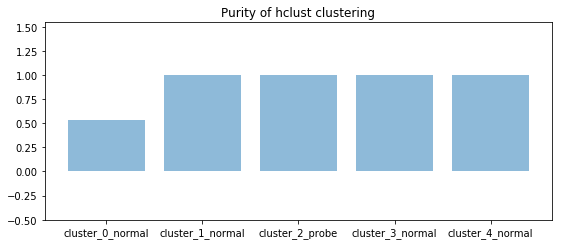

In [83]:
plot_index = 0
for cluster_type, y_pred in cluster_types.items():
    labels, purity = calcPurity(5, y_pred, y_train)
    labels = ["cluster_" + str(k) + "_" + val for k, val in labels.items()]
    sizes = [val for k, val in purity.items()]
    # print(sizes) # adds up to 1433, which is the total number of participants
    ax1 = plt.subplot(2,2,plot_index+1)
    ax1.figure.set_size_inches(20, 8)
#     ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
    plt.bar(labels, sizes, align='center', alpha=0.5)
    ax1.axis('equal')
    ax1.set_title("Purity of " + str(cluster_type) + " clustering")
    plot_index += 1
    plt.show()

# Question-2

In [84]:
from sklearn.datasets import load_digits
from sklearn.neighbors.kde import KernelDensity
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
digits = load_digits()
X = digits.data
y = digits.target

In [85]:
def generateAndPrintData(model, pca):
    '''
    Function to generate data using the 'model' after reducing using 'pca'
    '''
    new_data = kde.sample(48)
    new_data = pca.inverse_transform(new_data)

    # turn data into a 4x11 grid
    new_data = new_data.reshape((4, 12, -1))
    real_data = digits.data[:48].reshape((4, 12, -1))

    # plot real digits and resampled digits
    fig, ax = plt.subplots(9, 12, subplot_kw=dict(xticks=[], yticks=[]))
    for j in range(12):
        ax[4, j].set_visible(False)
        for i in range(4):
            im = ax[i, j].imshow(real_data[i, j].reshape((8, 8)),
                                 cmap=plt.cm.binary, interpolation='nearest')
            im.set_clim(0, 16)
            im = ax[i + 5, j].imshow(new_data[i, j].reshape((8, 8)),
                                     cmap=plt.cm.binary, interpolation='nearest')
            im.set_clim(0, 16)

    ax[0, 5].set_title('Selection from the input data')
    ax[5, 5].set_title('"New" digits drawn from the density model')
    plt.show()

## PART 1 - KDE

best bandwidth: 3.79269019073225


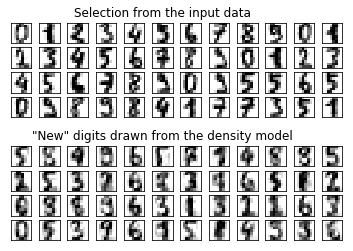

In [86]:
pca = PCA(n_components=15, whiten=False)
data = pca.fit_transform(digits.data)

# use grid search cross-validation to optimize the bandwidth
params = {'bandwidth': np.logspace(-1, 1, 20)}
grid = GridSearchCV(KernelDensity(), params, cv=5)
grid.fit(data)

print("best bandwidth: {0}".format(grid.best_estimator_.bandwidth))

# use the best estimator to compute the kernel density estimate
kde = grid.best_estimator_

generateAndPrintData(kde, pca)

## PART -2 GMM Density Estimation

In [87]:
import itertools
from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn import mixture

In [88]:
lowest_bic = np.infty
bic = []
best_n = None
n_components_range = range(1, 7)
best_cv_type = None
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = mixture.GaussianMixture(n_components=n_components,
                                      covariance_type=cv_type)
        gmm.fit(X)
        bic.append(gmm.bic(X))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm
            best_n = n_components
            best_cv_type = cv_type
clf = best_gmm
bic = np.array(bic)
# print("BIC Scores for n_components in range(1,7)")
# print(bic)
print("No. of components for best GMM is {0}".format(best_n))
print("Type of covariance_type for best GMM is {0}".format(best_cv_type))

No. of components for best GMM is 6
Type of covariance_type for best GMM is diag


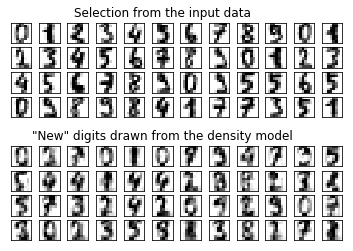

In [89]:
generateAndPrintData(clf,pca)

## PART - 3 Drawing 48 images by varing no.of components in PCA with GMM and KDE

Density estimates when PCA components is 15
With Kernal Density Estimate
best bandwidth: 3.79269019073225


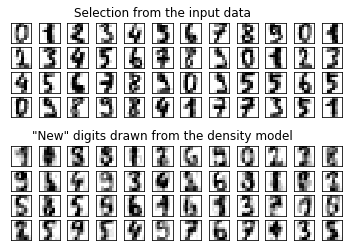

With GMM Density Estimate
No. of components for best GMM is 6
Type of covariance_type for best GMM is diag


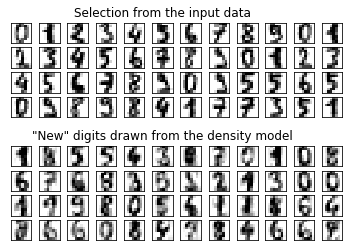

Density estimates when PCA components is 30
With Kernal Density Estimate
best bandwidth: 2.9763514416313175


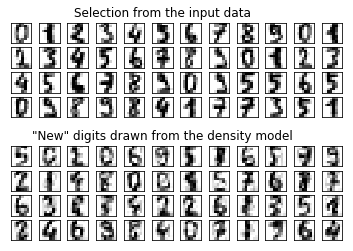

With GMM Density Estimate
No. of components for best GMM is 6
Type of covariance_type for best GMM is diag


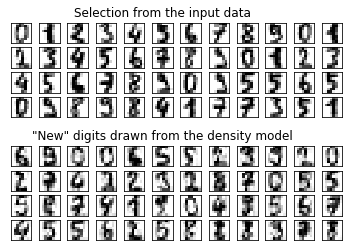

Density estimates when PCA components is 40
With Kernal Density Estimate
best bandwidth: 2.9763514416313175


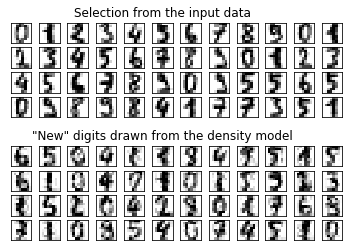

With GMM Density Estimate
No. of components for best GMM is 3
Type of covariance_type for best GMM is full


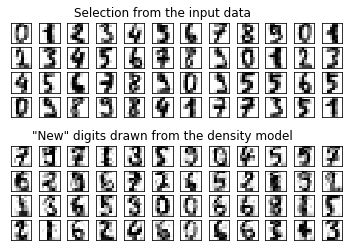

In [90]:
for n_comps in [15,30,40]:
    print("Density estimates when PCA components is {0}".format(n_comps))
    pca = PCA(n_components=n_comps, whiten=False)
    data = pca.fit_transform(digits.data)
    print("With Kernal Density Estimate")
    # use grid search cross-validation to optimize the bandwidth
    params = {'bandwidth': np.logspace(-1, 1, 20)}
    grid = GridSearchCV(KernelDensity(), params, cv=5)
    grid.fit(data)

    print("best bandwidth: {0}".format(grid.best_estimator_.bandwidth))

    # use the best estimator to compute the kernel density estimate
    kde = grid.best_estimator_

    generateAndPrintData(kde, pca)
    
    print("With GMM Density Estimate")
    lowest_bic = np.infty
    bic = []
    best_n = None
    n_components_range = range(1, 7)
    best_cv_type = None
    cv_types = ['spherical', 'tied', 'diag', 'full']
    for cv_type in cv_types:
        for n_components in n_components_range:
            # Fit a Gaussian mixture with EM
            gmm = mixture.GaussianMixture(n_components=n_components,
                                          covariance_type=cv_type)
            gmm.fit(X)
            bic.append(gmm.bic(X))
            if bic[-1] < lowest_bic:
                lowest_bic = bic[-1]
                best_gmm = gmm
                best_n = n_components
                best_cv_type = cv_type
    clf = best_gmm
    bic = np.array(bic)
    # print("BIC Scores for n_components in range(1,7)")
    # print(bic)
    print("No. of components for best GMM is {0}".format(best_n))
    print("Type of covariance_type for best GMM is {0}".format(best_cv_type))
    generateAndPrintData(clf,pca)